In [13]:
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
'''
id - ID code for essay response
discourse_id - ID code for discourse element
discourse_start - character position where discourse element begins in the essay response
discourse_end - character position where discourse element ends in the essay response
discourse_text - text of discourse element
discourse_type - classification of discourse element
discourse_type_num - enumerated class label of discourse element
predictionstring - the word indices of the training sample, as required for predictions
'''
train = pd.read_csv("datasets/train.csv")
train.head()

,id,discourse_id,discourse_start,discourse_end,discourse_text,discourse_type,discourse_type_num,predictionstring
0,423A1CA112E2,1.622628e+12,8.0,229.0,Modern humans today are always on their phone....,Lead,Lead 1,1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 1...
1,423A1CA112E2,1.622628e+12,230.0,312.0,They are some really bad consequences when stu...,Position,Position 1,45 46 47 48 49 50 51 52 53 54 55 56 57 58 59
2,423A1CA112E2,1.622628e+12,313.0,401.0,Some certain areas in the United States ban ph...,Evidence,Evidence 1,60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75
3,423A1CA112E2,1.622628e+12,402.0,758.0,"When people have phones, they know about certa...",Evidence,Evidence 2,76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 9...
4,423A1CA112E2,1.622628e+12,759.0,886.0,Driving is one of the way how to get around. P...,Claim,Claim 1,139 140 141 142 143 144 145 146 147 148 149 15...


In [15]:
# 同一id表示属于同一句话
train.query('id == "423A1CA112E2"')

,id,discourse_id,discourse_start,discourse_end,discourse_text,discourse_type,discourse_type_num,predictionstring
0,423A1CA112E2,1.622628e+12,8.0,229.0,Modern humans today are always on their phone....,Lead,Lead 1,1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 1...
1,423A1CA112E2,1.622628e+12,230.0,312.0,They are some really bad consequences when stu...,Position,Position 1,45 46 47 48 49 50 51 52 53 54 55 56 57 58 59
2,423A1CA112E2,1.622628e+12,313.0,401.0,Some certain areas in the United States ban ph...,Evidence,Evidence 1,60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75
3,423A1CA112E2,1.622628e+12,402.0,758.0,"When people have phones, they know about certa...",Evidence,Evidence 2,76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 9...
4,423A1CA112E2,1.622628e+12,759.0,886.0,Driving is one of the way how to get around. P...,Claim,Claim 1,139 140 141 142 143 144 145 146 147 148 149 15...
5,423A1CA112E2,1.622628e+12,887.0,1150.0,That's why there's a thing that's called no te...,Evidence,Evidence 3,163 164 165 166 167 168 169 170 171 172 173 17...
6,423A1CA112E2,1.622628e+12,1151.0,1533.0,Sometimes on the news there is either an accid...,Evidence,Evidence 4,211 212 213 214 215 216 217 218 219 220 221 22...
7,423A1CA112E2,1.622628e+12,1534.0,1602.0,Phones are fine to use and it's also the best ...,Claim,Claim 2,282 283 284 285 286 287 288 289 290 291 292 29...
8,423A1CA112E2,1.622628e+12,1603.0,1890.0,If you go through a problem and you can't find...,Evidence,Evidence 5,297 298 299 300 301 302 303 304 305 306 307 30...
9,423A1CA112E2,1.622628e+12,1891.0,2027.0,The news always updated when people do somethi...,Concluding Statement,Concluding Statement 1,355 356 357 358 359 360 361 362 363 364 365 36...


In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144293 entries, 0 to 144292
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  144293 non-null  object 
 1   discourse_id        144293 non-null  float64
 2   discourse_start     144293 non-null  float64
 3   discourse_end       144293 non-null  float64
 4   discourse_text      144293 non-null  object 
 5   discourse_type      144293 non-null  object 
 6   discourse_type_num  144293 non-null  object 
 7   predictionstring    144293 non-null  object 
dtypes: float64(3), object(5)
memory usage: 8.8+ MB


In [17]:
'''
Lead - an introduction that begins with a statistic, a quotation, a description, or some other device to grab the reader’s attention and point toward the thesis
Position - an opinion or conclusion on the main question
Claim - a claim that supports the position
Counterclaim - a claim that refutes another claim or gives an opposing reason to the position
Rebuttal - a claim that refutes a counterclaim
Evidence - ideas or examples that support claims, counterclaims, or rebuttals.
Concluding Statement - a concluding statement that restates the claims
'''
train['discourse_type'].value_counts()

Claim                   50208
Evidence                45702
Position                15419
Concluding Statement    13505
Lead                     9305
Counterclaim             5817
Rebuttal                 4337
Name: discourse_type, dtype: int64

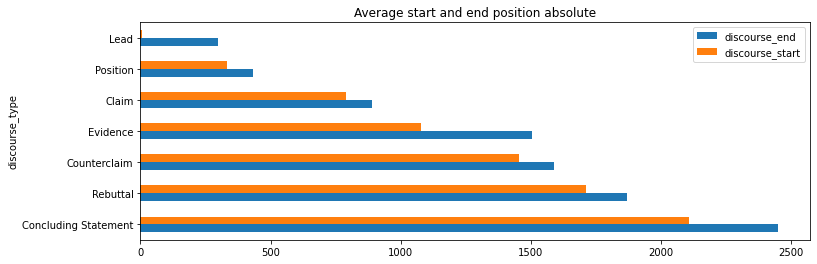

In [18]:
data = train.groupby("discourse_type")[['discourse_end', 'discourse_start']].mean().reset_index().sort_values(
    by='discourse_start', ascending=False)
data.plot(x='discourse_type',
          kind='barh',
          stacked=False,
          title='Average start and end position absolute',
          figsize=(12, 4))
plt.show()

In [19]:
train['discourse_type_num'].value_counts()

Evidence 1                15550
Position 1                15366
Claim 1                   14927
Evidence 2                14020
Concluding Statement 1    13418
Claim 2                   13212
Evidence 3                10373
Claim 3                    9862
Lead 1                     9301
Claim 4                    5619
Counterclaim 1             4576
Evidence 4                 3840
Rebuttal 1                 3598
Claim 5                    3498
Claim 6                    2589
Evidence 5                 1299
Counterclaim 2              948
Rebuttal 2                  578
Evidence 6                  426
Claim 7                     324
Counterclaim 3              223
Rebuttal 3                  131
Claim 8                     122
Evidence 7                  121
Concluding Statement 2       85
Position 2                   53
Counterclaim 4               49
Evidence 8                   46
Claim 9                      34
Rebuttal 4                   21
Evidence 9                   16
Counterc